<a href="https://colab.research.google.com/github/DihanGi/datasets/blob/master/Non_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import('/content/w2_position_salaries-220925-153437.csv')


SyntaxError: invalid syntax (<ipython-input-1-da6251ffa72f>, line 1)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/w2_position_salaries-220925-153437.csv')
df.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
import numpy as np
plt.plot(Level, Salary)

NameError: name 'Level' is not defined

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Load the dataset
dataset = pd.read_csv('/content/w2_position_salaries-220925-153437.csv')

# Extract input and output columns
X = dataset[['Level']]
y = dataset['Salary']



R2 Score of Simple Linear Regression: 0.6690412331929895
R2 Score of Polynomial Regression (degree=2): 0.9162082221443942
R2 Score of Polynomial Regression (degree=3): 0.9812097727913366
R2 Score of Polynomial Regression (degree=4): 0.9973922891706614


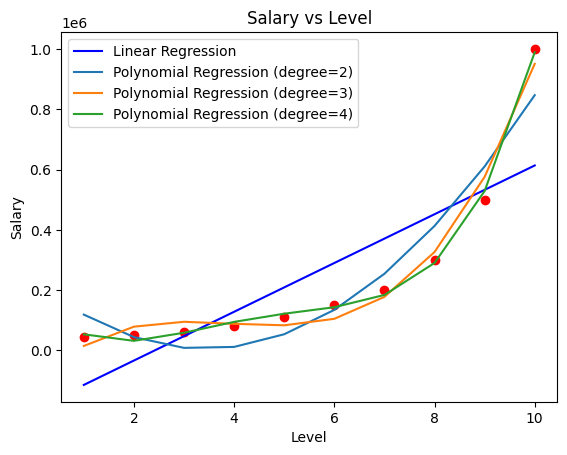

In [ ]:
# Train a simple linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Predict and calculate R2 score for linear regression
y_pred_linear = linear_regressor.predict(X)
r2_linear = r2_score(y, y_pred_linear)
print(f"R2 Score of Simple Linear Regression: {r2_linear}")

# Function to train polynomial regression model and calculate R2 score
def polynomial_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    poly_regressor = LinearRegression()
    poly_regressor.fit(X_poly, y)

    y_pred_poly = poly_regressor.predict(X_poly)
    r2_poly = r2_score(y, y_pred_poly)

    return r2_poly

# Train polynomial regression models with degrees 2, 3, and 4 and compute their R2 scores
degrees = [2, 3, 4]
r2_scores = {}

for degree in degrees:
    r2_scores[degree] = polynomial_regression(degree)
    print(f"R2 Score of Polynomial Regression (degree={degree}): {r2_scores[degree]}")

# Plot the results
plt.scatter(X, y, color='red')
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression')

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_poly, y)
    y_pred_poly = poly_regressor.predict(X_poly)

    plt.plot(X, y_pred_poly, label=f'Polynomial Regression (degree={degree})')

plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()